In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris=load_iris()
from sklearn.model_selection import train_test_split
lr=LogisticRegression()
scores=cross_val_score(lr,iris.data,iris.target,cv=3)
print(scores)
import numpy as np

[0.98 0.96 0.98]


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


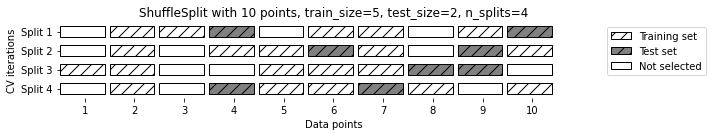

In [7]:
import mglearn
mglearn.plots.plot_shuffle_split()

In [11]:
from sklearn.model_selection import GroupKFold
# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group,
# then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(lr, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))


TypeError: cross_val_score() takes from 2 to 3 positional arguments but 4 positional arguments (and 1 keyword-only argument) were given

In [18]:
from sklearn.datasets import load_iris
iris=load_iris()
xtr,xte,ytr,yte=train_test_split(iris.data,iris.target,random_state=0)
from sklearn.svm import SVC
best_score=0


for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        s=SVC(gamma=gamma,C=C)
        s.fit(xtr,ytr)
        scores=s.score(xte,yte)
        
        if scores>best_score:
            best_score=scores
            g=gamma
            c_n=C
print(g,c_n,best_score)
        

0.001 100 0.9736842105263158


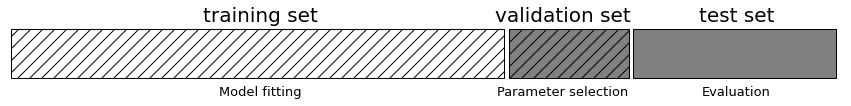

In [19]:
mglearn.plots.plot_threefold_split()

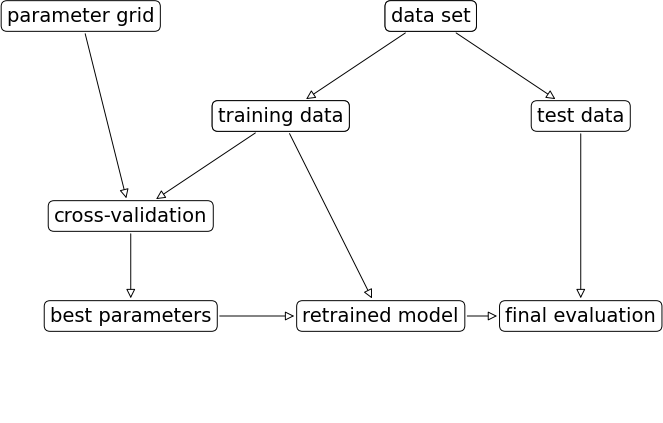

In [21]:
mglearn.plots.plot_grid_search_overview()

In [30]:
from sklearn.model_selection import GridSearchCV
svclassifier=SVC()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

gridsearch=GridSearchCV(svclassifier,param_grid=param_grid,cv=5)

xtr,xte,ytr,yte=train_test_split(iris.data,iris.target,random_state=0)

gridsearch.fit(xtr,ytr)
print("best_score with gridsearch= ", gridsearch.score(xte,yte))
print(gridsearch.best_params_)
import pandas as pd

best_score with gridsearch=  0.9736842105263158
{'C': 10, 'gamma': 0.1}


In [31]:
df=pd.DataFrame(gridsearch.cv_results_)
display(df.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001799,0.000400,0.000801,0.000400,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.000799,0.000400,0.000400,0.000490,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000999,0.000006,0.000999,0.000001,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.001592,0.000804,0.001010,0.000651,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.001215,0.000428,0.000400,0.000490,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


In [33]:
scores=np.array(df.mean_test_score).reshape(6,6)

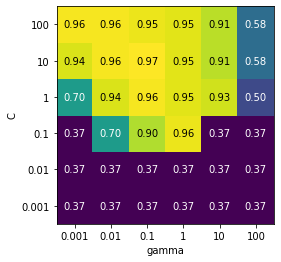

In [34]:
mglearn.tools.heatmap(scores,xlabel='gamma',xticklabels=param_grid['gamma'],ylabel='C',yticklabels=param_grid['C'],cmap="viridis")

In [39]:


param_grid = [{'kernel': ['rbf'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100],
 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
 {'kernel': ['linear'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

gridsearch=GridSearchCV(SVC(),param_grid,cv=5)
gridsearch.fit(xtr,ytr)
res=pd.DataFrame(gridsearch.cv_results_)
display(res.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.001797,0.002198,0.001198,0.001,0.001401,0.002201,0.0016,0.0012,0.001,0.000801,...,0.0004,0.001002,0.001827,0.001801,0.001401,0.000399,0.000599,0.0006,0.000199,0.0
std_fit_time,0.000399,0.000746,0.000401,0.000002,0.000505,0.000979,0.000489,0.000398,0.000002,0.0004,...,0.00049,0.002003,0.002189,0.000747,0.000489,0.000489,0.000489,0.00049,0.000399,0.0
mean_score_time,0.001404,0.001198,0.001001,0.000799,0.0008,0.0008,0.001,0.000398,0.000399,0.0004,...,0.000325,0.0,0.000199,0.000999,0.0006,0.0006,0.0004,0.0004,0.000423,0.00201
std_score_time,0.00049,0.000402,0.000633,0.0004,0.000749,0.000748,0.000001,0.000488,0.000489,0.000489,...,0.000651,0.0,0.000399,0.000632,0.00049,0.00049,0.00049,0.00049,0.00052,0.002462
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1.0,0.956522


In [44]:
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2],
 random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)



C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


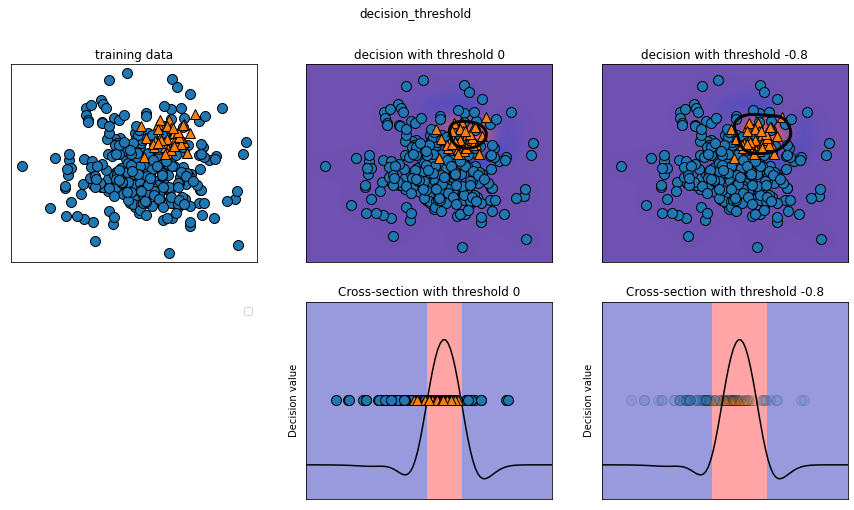

In [42]:
mglearn.plots.plot_decision_threshold()

In [45]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds=precision_recall_curve(y_test,svc.decision_function(X_test))

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Recall')

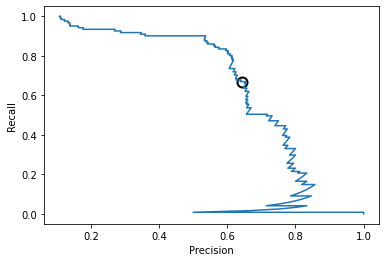

In [48]:
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2],
 random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
 y_test, svc.decision_function(X_test))

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
 y_test, rf.predict_proba(X_test)[:, 1])

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
 label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")


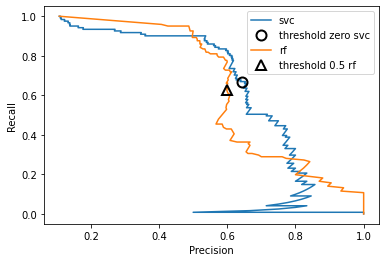

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
 y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
 label="threshold zero svc", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
 markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")


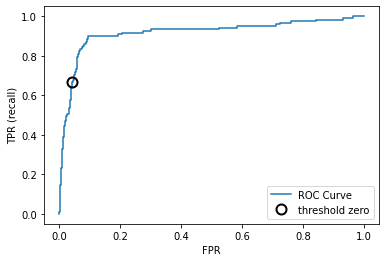

In [50]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
 label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
